In [2]:
#importacion de bibliotecas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline 


In [4]:
train = pd.read_csv("../TimeSeriesForecastingCompetition/Train_SU63ISt.csv")
test = pd.read_csv("../TimeSeriesForecastingCompetition/Test_0qrQsBZ.csv")

In [5]:
test.head(30)

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00
5,18293,26-09-2014 05:00
6,18294,26-09-2014 06:00
7,18295,26-09-2014 07:00
8,18296,26-09-2014 08:00
9,18297,26-09-2014 09:00


Hipotesis previas :
* El trafico va a aumentar con el correr de los años
* El trafico va a ser mayor entre Mayo y Ocutubre( es el periodo con mas turistas)
* Los dias de semana habra mas trafico que los fines de semana
* El trafico durante las horas picos sera mayor

In [6]:
train_original=train.copy() 
test_original=test.copy()

In [7]:
train.columns, test.columns


(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [8]:
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [9]:
train.shape , test.shape

((18288, 3), (5112, 2))

In [10]:
train["Datetime"] = pd.to_datetime(train.Datetime,format = "%d-%m-%Y %H:%M")
test["Datetime"] = pd.to_datetime(test.Datetime, format = "%d-%m-%Y %H:%M")
train_original["Datetime"] = pd.to_datetime(train_original.Datetime, format = "%d-%m-%Y %H:%M")
test_original["Datetime"] =  pd.to_datetime(test_original.Datetime , format="%d-%m-%Y %H:%M")

In [11]:
for i in(train, test, test_original, train_original):
    i["year"] = i.Datetime.dt.year
    i["month"] = i.Datetime.dt.month 
    i["day"]  = i.Datetime.dt.day
    i["hour"] = i.Datetime.dt.hour

In [12]:
train['day of week']=train['Datetime'].dt.dayofweek 
temp = train['Datetime']

In [13]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0 
train['weekend'] = train['Datetime'].apply(applyer) 


C:\Users\Tomas\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


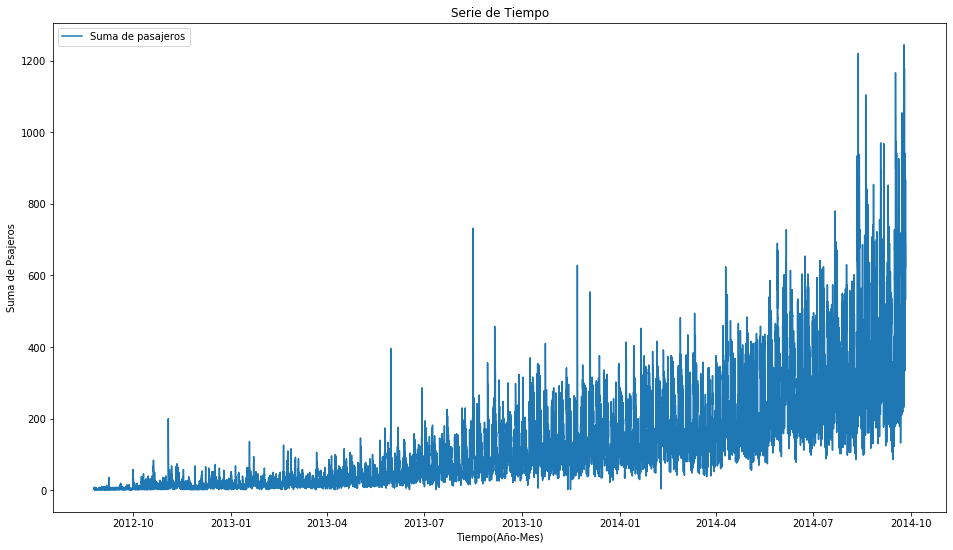

In [14]:
train.index = train['Datetime'] 
df=train.drop('ID',1)            
ts = df['Count'] 
plt.figure(figsize=(16,9)) 
plt.plot(ts, label='Suma de pasajeros') 
plt.title("Serie de Tiempo") 
plt.xlabel("Tiempo(Año-Mes)") 
plt.ylabel("Suma de Psajeros") 
plt.legend()

In [15]:
### Validacion de Hipotesis

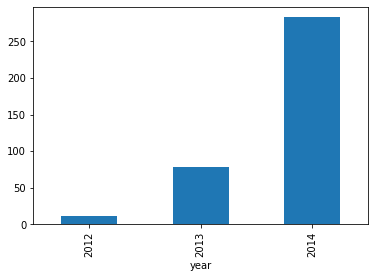

In [16]:
train.groupby("year")["Count"].mean().plot.bar()

In [17]:
# La primera hipotisis parece verdadera ya que con el correr de los años, tiende a umentar la cantidad de pasajeros

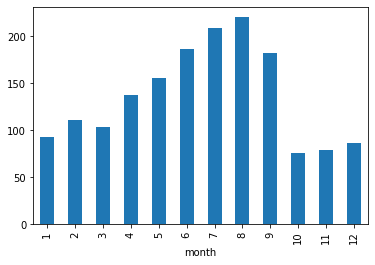

In [18]:
train.groupby("month")["Count"].mean().plot.bar()

In [19]:
# el promedio para los ultimos 3 años parece excesivamente bajo, voy a verificar cada año para ver si encuentro algun error

train.groupby(["year","month"]).mean()

Como vemos esos meses no se contabilizaron, podemos observar que el unico año en el que se registraron todos los meses es el 2013, por lo que es dificil inferir una estacionalidad, igualmente se ve que en los meses de mayo a octubre hay un mayor trafico, sin embargo siento que no hay suficientes datos como para validar nuestra segunda hipotesis

Text(0.5, 0, '0: Dia de semana, 1: Fin de semana')

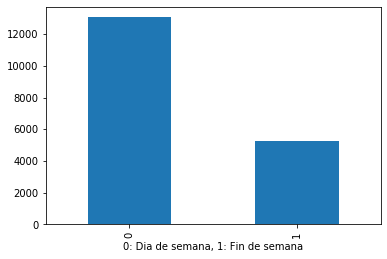

In [20]:
train.groupby("weekend")["Count"].count().plot.bar()
plt.xlabel("0: Dia de semana, 1: Fin de semana") 


Se ve mayor trafico los dias de semana, por lo que validamos nuestra tercera hipotesis.

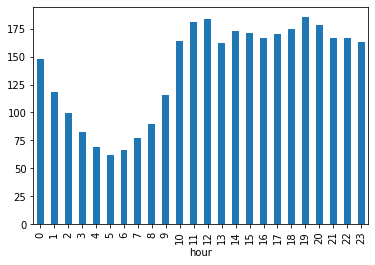

In [21]:
train.groupby("hour")["Count"].mean().plot.bar()

 Se ve mayor cantidad de gente en las horas pico, sin embargo no hay tanta diferencia con el resto del dia exceptuando en la noche(despues de las 12)que recae bastante la cantidad de pasajeros. Por lo que podemos validar nuestra hipotesis de que en las horas picos es cuando mas pasajeros hay.

In [22]:
# Tecnicas de modelado

In [23]:
train= train.drop("ID", axis= 1)

In [24]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 

hourly = train.resample('H').mean() 

daily = train.resample('D').mean() 

weekly = train.resample('W').mean() 

monthly = train.resample('M').mean()

C:\Users\Tomas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


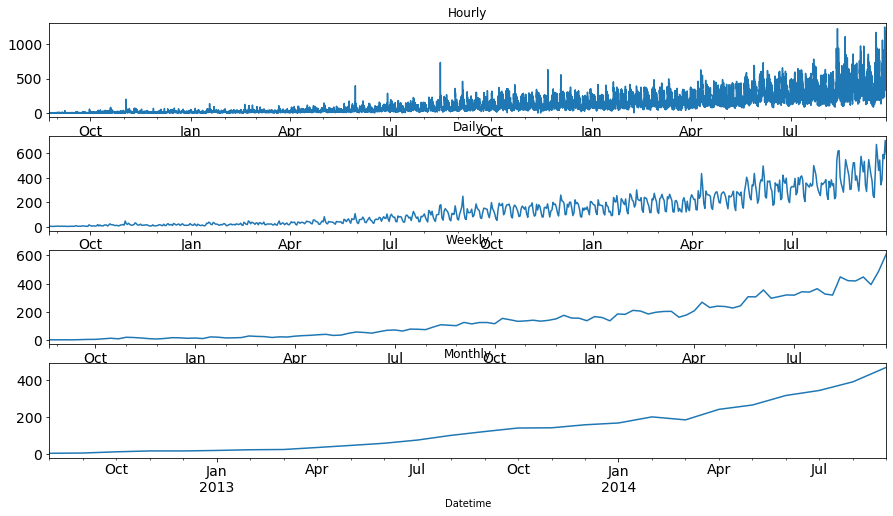

In [25]:
fig, axs = plt.subplots(4,1) 
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0]) 
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2]) 
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]) 
plt.show()


In [26]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp  

test = test.resample('D').mean() 

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index = train.Timestamp 
train = train.resample('D').mean()

C:\Users\Tomas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [27]:
#Separo entre datos de entrenamiento y prueba

In [28]:
Train=train.ix['2012-08-25':'2014-06-24'] 
Test=train.ix['2014-06-25':'2014-09-25']

C:\Users\Tomas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\Tomas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


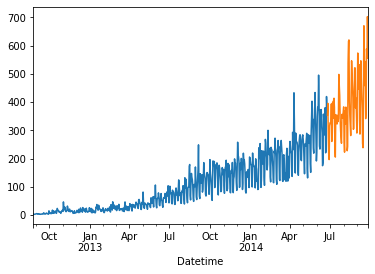

In [29]:
#Separo los datos en entrenamiento(los azules) y prueba(naraja)
Train.Count.plot(label='train') 
Test.Count.plot(label='Test') 
plt.show()

In [30]:
# Exponential Smothing

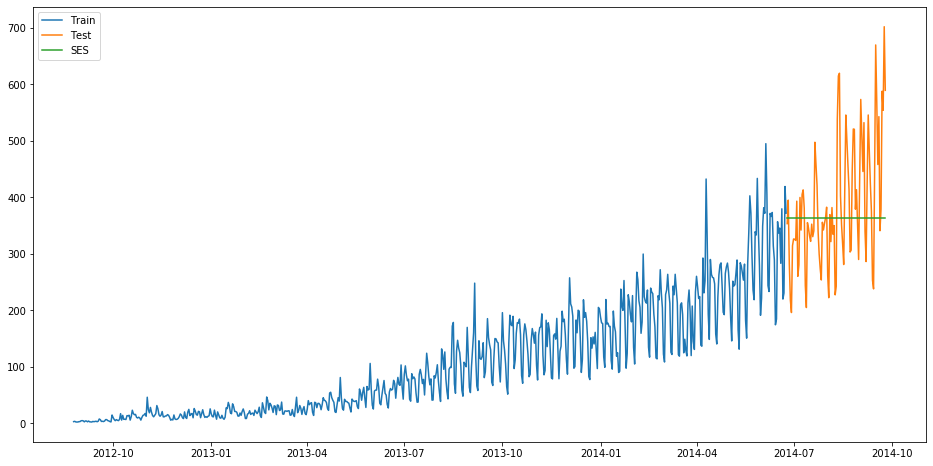

In [31]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 
y_hat_avg = Test.copy() 
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(Test)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(Test['Count'], label='Test') 
plt.plot(y_hat_avg['SES'], label='SES') 
plt.legend(loc='best') 
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error 
from math import sqrt
rms = sqrt(mean_squared_error(Test.Count, y_hat_avg.SES)) 
print(rms)


113.43708111884514


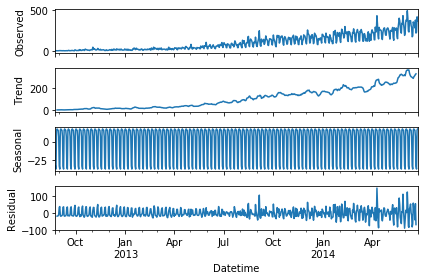

In [33]:
import statsmodels.api as sm 
sm.tsa.seasonal_decompose(Train.Count).plot() 
result = sm.tsa.stattools.adfuller(train.Count) 
plt.show()


In [34]:
# Holt winter’s model

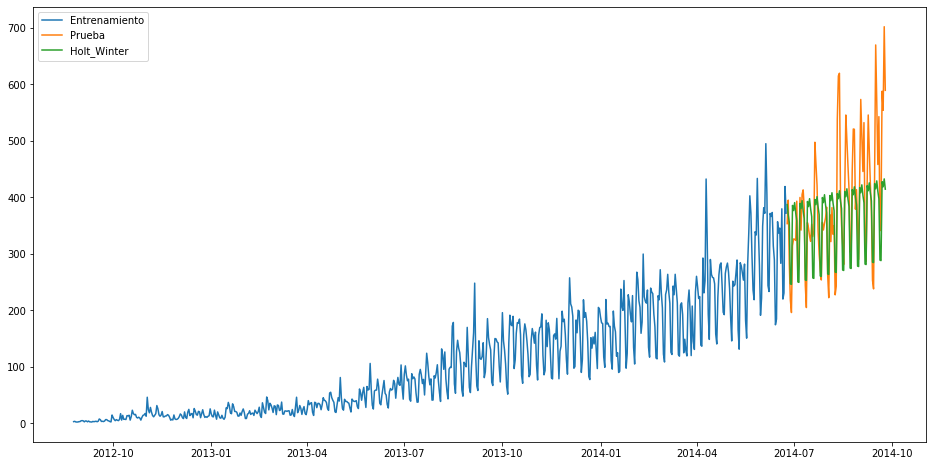

In [35]:
y_hat_avg = Test.copy() 
fit1 = ExponentialSmoothing(np.asarray(Train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit() 
y_hat_avg['Holt_Winter'] = fit1.forecast(len(Test)) 
plt.figure(figsize=(16,8)) 
plt.plot( Train['Count'], label='Entrenamiento') 
plt.plot(Test['Count'], label='Prueba') 
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter') 
plt.legend(loc='best') 
plt.show()

In [36]:
predict=fit1.forecast(len(test))
predict

array([387.36240142, 369.13970768, 355.56672625, 247.09623009,
       246.20057247, 385.88561353, 376.81071637, 390.86293762,
       372.64024387, 359.06726244, 250.59676628, 249.70110866,
       389.38614972, 380.31125256, 394.36347381, 376.14078006,
       362.56779863, 254.09730247, 253.20164485, 392.88668591,
       383.81178875, 397.86401   , 379.64131625, 366.06833482,
       257.59783866, 256.70218104, 396.38722211, 387.31232494,
       401.36454619, 383.14185244, 369.56887101, 261.09837485,
       260.20271723, 399.8877583 , 390.81286113, 404.86508238,
       386.64238863, 373.0694072 , 264.59891105, 263.70325342,
       403.38829449, 394.31339733, 408.36561857, 390.14292482,
       376.5699434 , 268.09944724, 267.20378962, 406.88883068,
       397.81393352, 411.86615476, 393.64346101, 380.07047959,
       271.59998343, 270.70432581, 410.38936687, 401.31446971,
       415.36669095, 397.14399721, 383.57101578, 275.10051962,
       274.204862  , 413.88990306, 404.8150059 , 418.86

In [37]:
# Arima model

In [38]:
# Prueba de Dickey Fuller para ver si hay esacionalidad

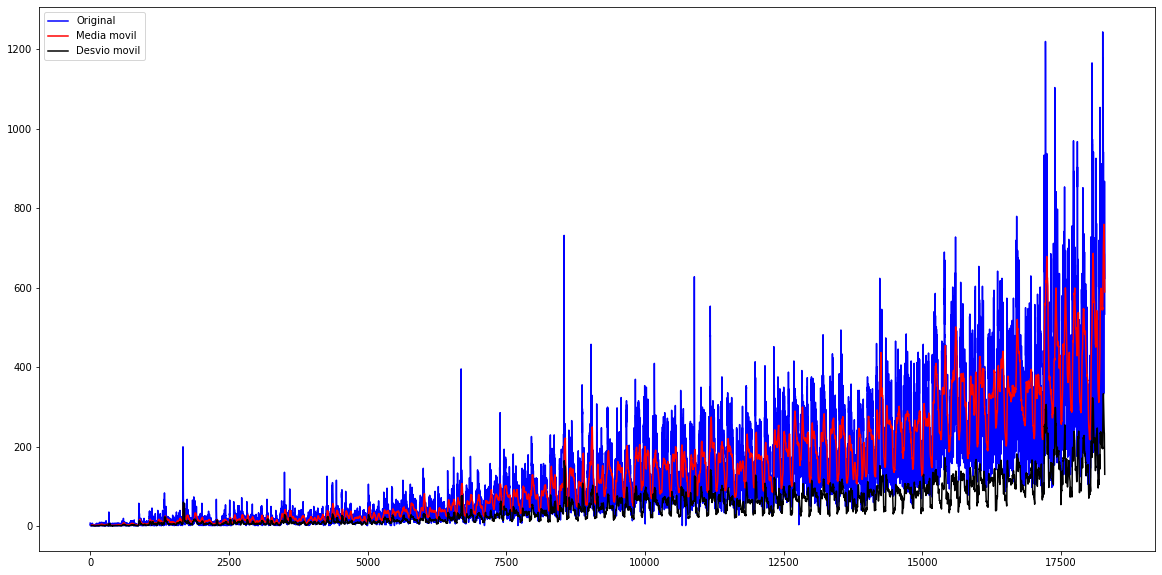

Resultados del test de Dickey-Fuller
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [39]:
from statsmodels.tsa.stattools import adfuller 
from pandas import DataFrame
def test_stationarity(timeseries):
        #determino la media y el desvio moviles
    rolmean = timeseries.rolling( window=24).mean()# 24 hours on each day
    rolstd = timeseries.rolling(window=24).std()
        # las grafico
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Media movil')
    std = plt.plot(rolstd, color='black', label = 'Desvio movil')
    plt.legend()
    plt.show(block=False)
        #Dickey-Fuller test:
    print ("Resultados del test de Dickey-Fuller")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10
test_stationarity(train_original['Count'])

Test Statistic < Critical value : entonces rechazo la hipotesis nula ( en este caso , rechazo que no sea estacionaria ) por lo tanto es estacionaria

todavia queda eliminar la tendencia de los datos y ademas todavia se puede hacer mas estacionaria la serie.

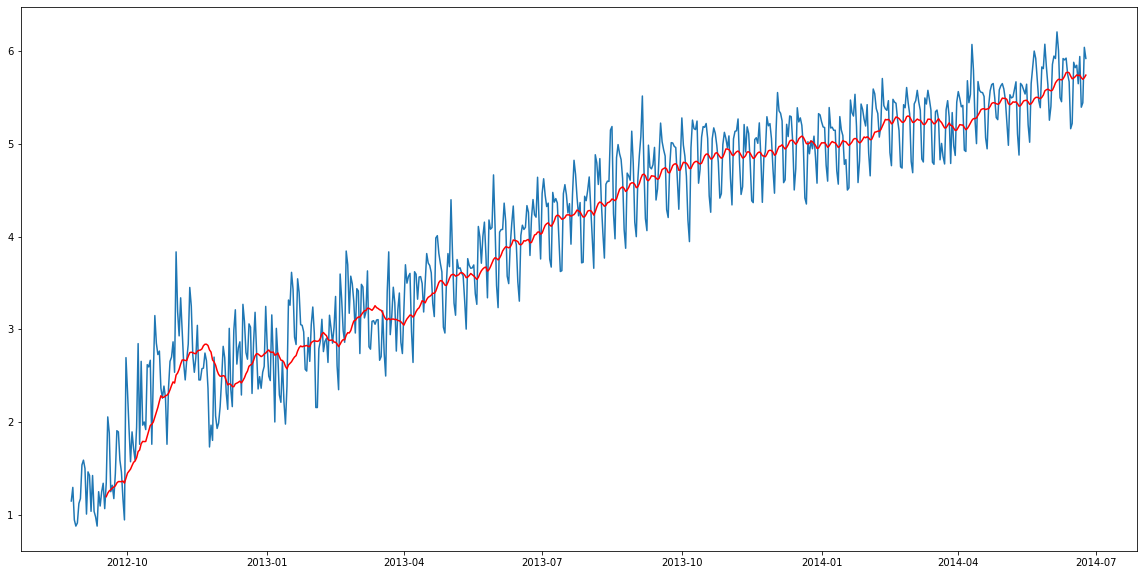

In [41]:
Train_log = np.log(Train['Count']) 
valid_log = np.log(Test['Count'])
moving_avg = Train_log.rolling( 24).mean()
plt.plot(Train_log) 
plt.plot(moving_avg, color = 'red') 
plt.show()

In [42]:
# eliminamos la tendencia creciente

In [43]:
train_log_moving_avg_diff = Train_log - moving_avg


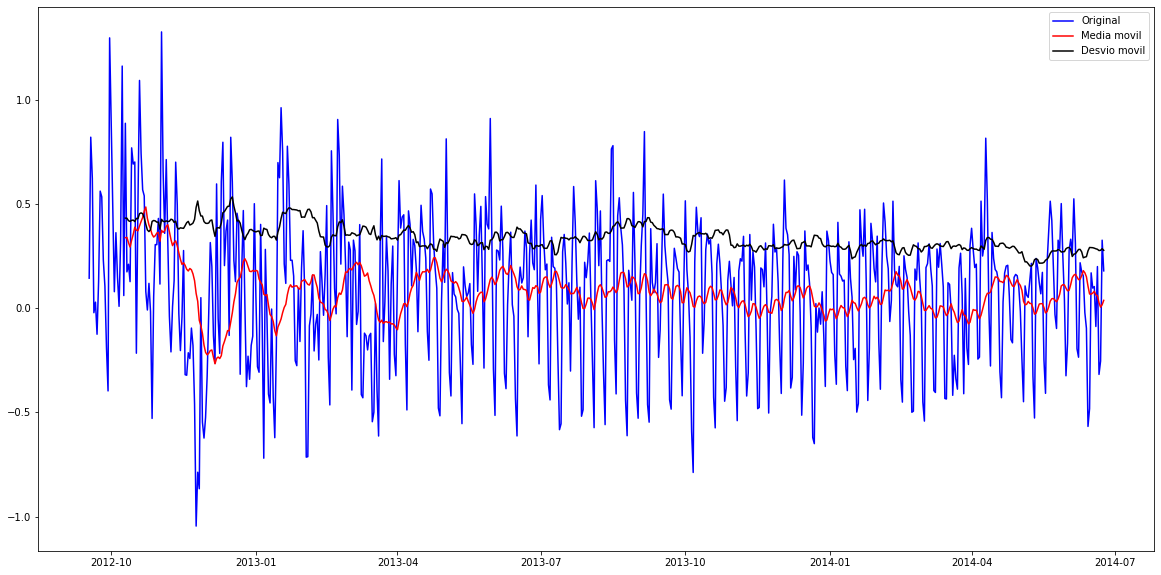

Resultados del test de Dickey-Fuller
Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [44]:
#dejamos caer los valores nulos

train_log_moving_avg_diff.dropna(inplace = True) 
test_stationarity(train_log_moving_avg_diff)


In [45]:
estabilizacion de la media

SyntaxError: invalid syntax (<ipython-input-45-70ff6d947117>, line 1)

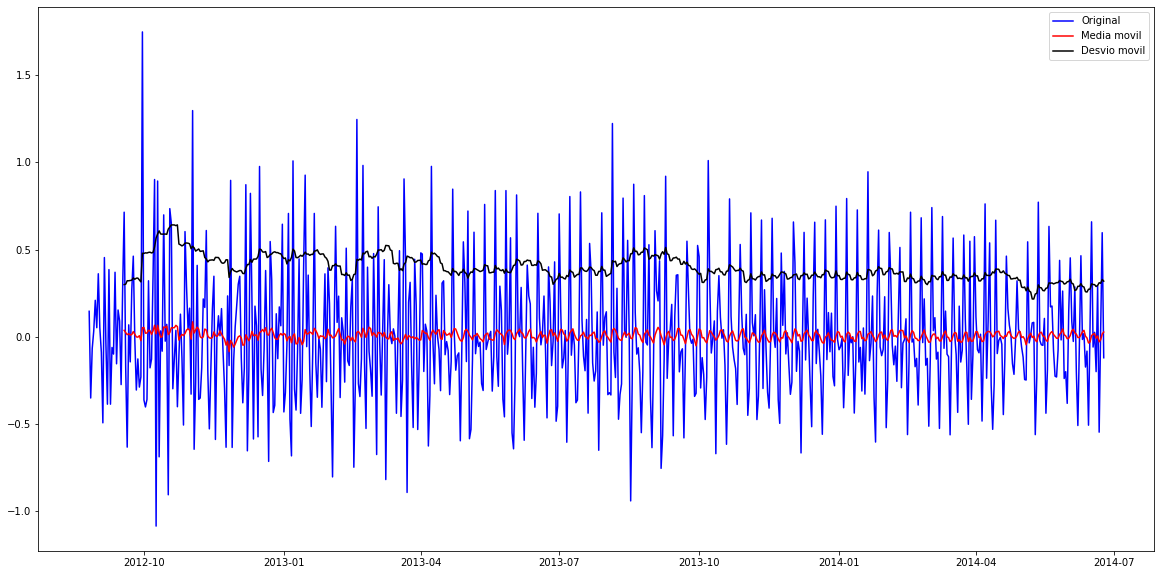

Resultados del test de Dickey-Fuller
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [46]:
train_log_diff = Train_log - Train_log.shift(1) 
test_stationarity(train_log_diff.dropna())

Ahora descompondremos las series temporales en tendencia y estacionalidad y obtendremos el residual, que es la variación aleatoria en la serie

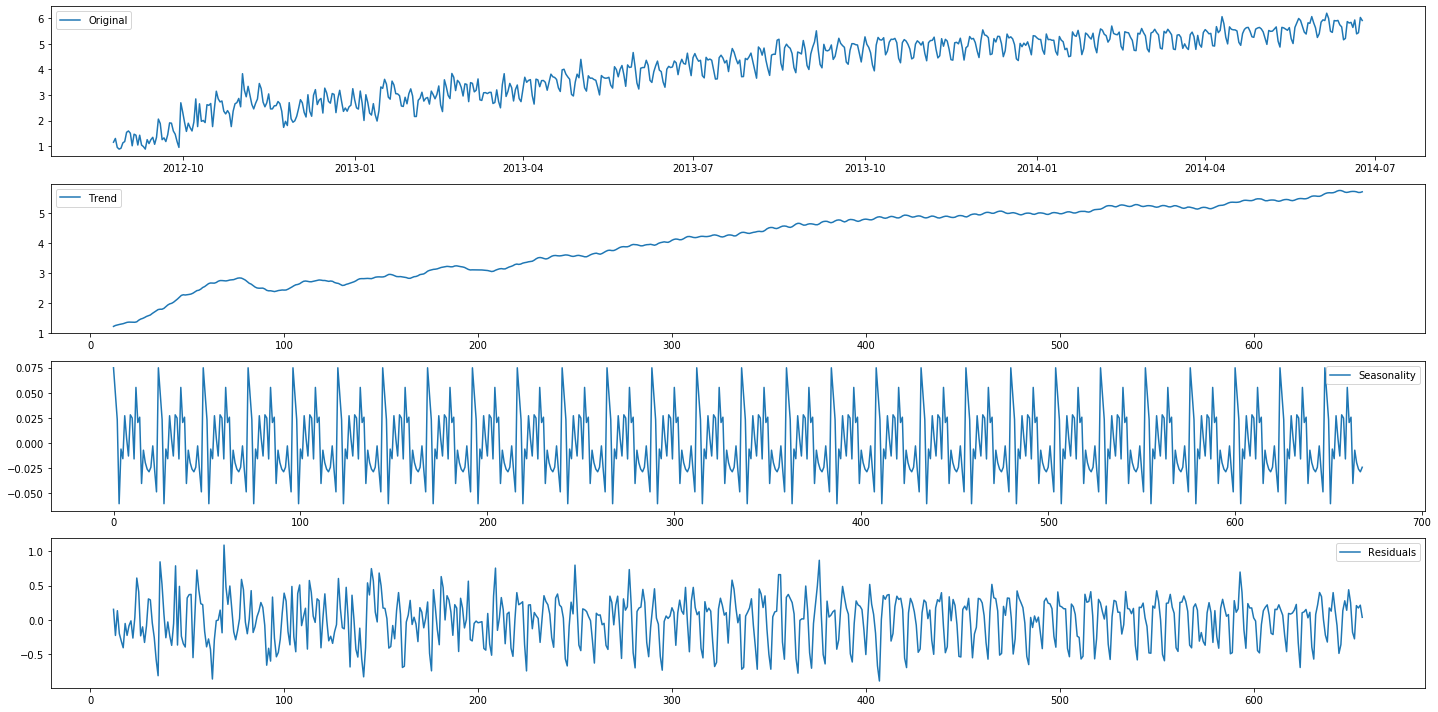

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq = 24) 

trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 

plt.subplot(411) 
plt.plot(Train_log, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonal,label='Seasonality') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Residuals') 
plt.legend(loc='best') 
plt.tight_layout() 
plt.show()


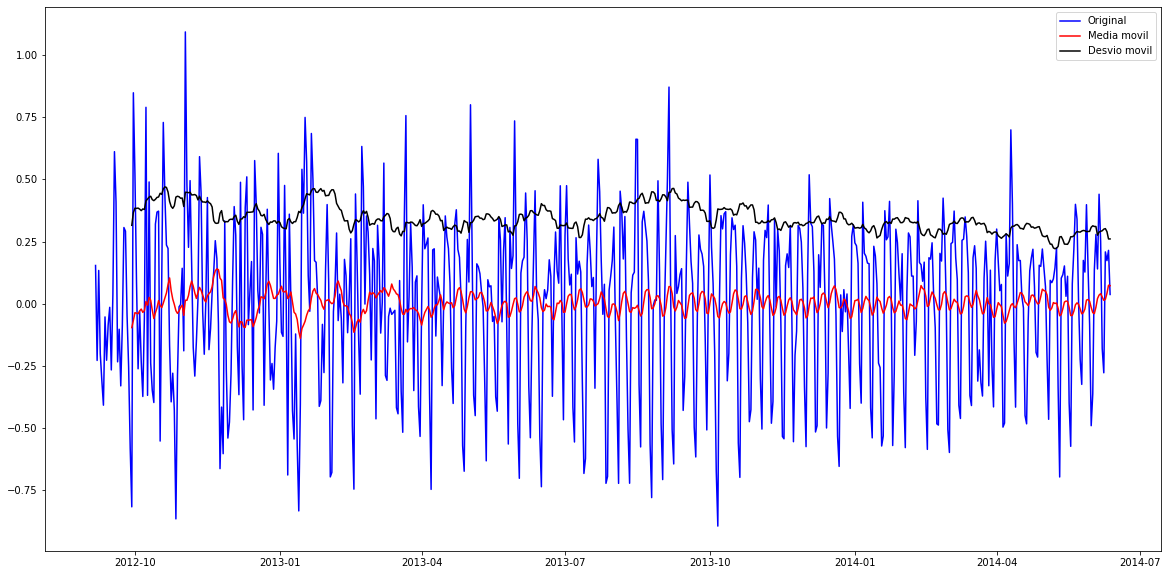

Resultados del test de Dickey-Fuller
Test Statistic                -7.822096e+00
p-value                        6.628321e-12
#Lags Used                     2.000000e+01
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


In [48]:
#estacionaridad de los residuos

train_log_decompose = pd.DataFrame(residual) 
train_log_decompose['date'] = Train_log.index 
train_log_decompose.set_index('date', inplace = True) 
train_log_decompose.dropna(inplace=True) 
test_stationarity(train_log_decompose[0])

In [49]:
# son estacionarios

In [50]:
# ahora aplico los modelos

In [51]:
# Lo primero es encontrar los valores optimos para los parametros p,d y q , lo voy a hacer mediante los graficos ACF Y PACF

In [52]:
from statsmodels.tsa.stattools import acf, pacf 
lag_acf = acf(train_log_diff.dropna(), nlags=25) 
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')


C:\Users\Tomas\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


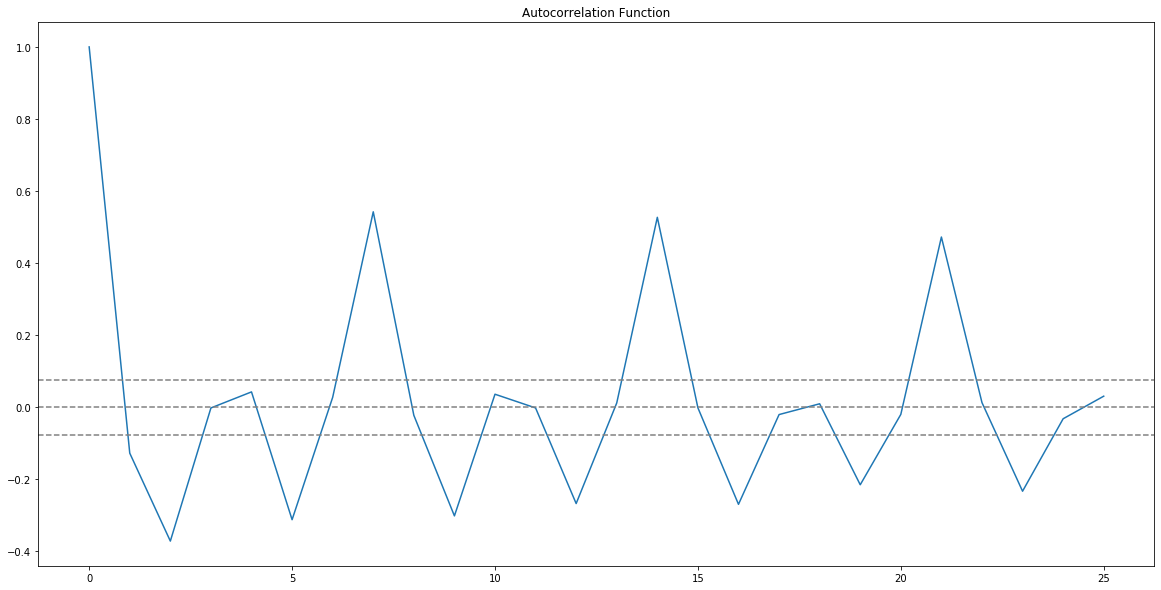

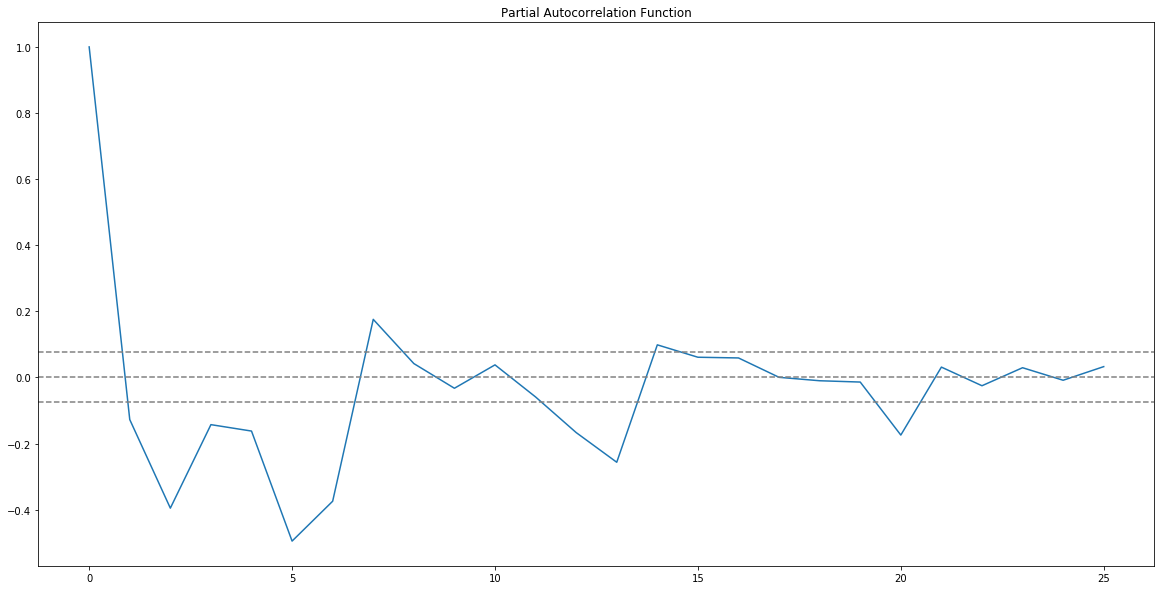

In [53]:
#Parcela ACF y PACF
plt.plot(lag_acf) 
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.title('Autocorrelation Function') 
plt.show() 
plt.plot(lag_pacf) 
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.show()


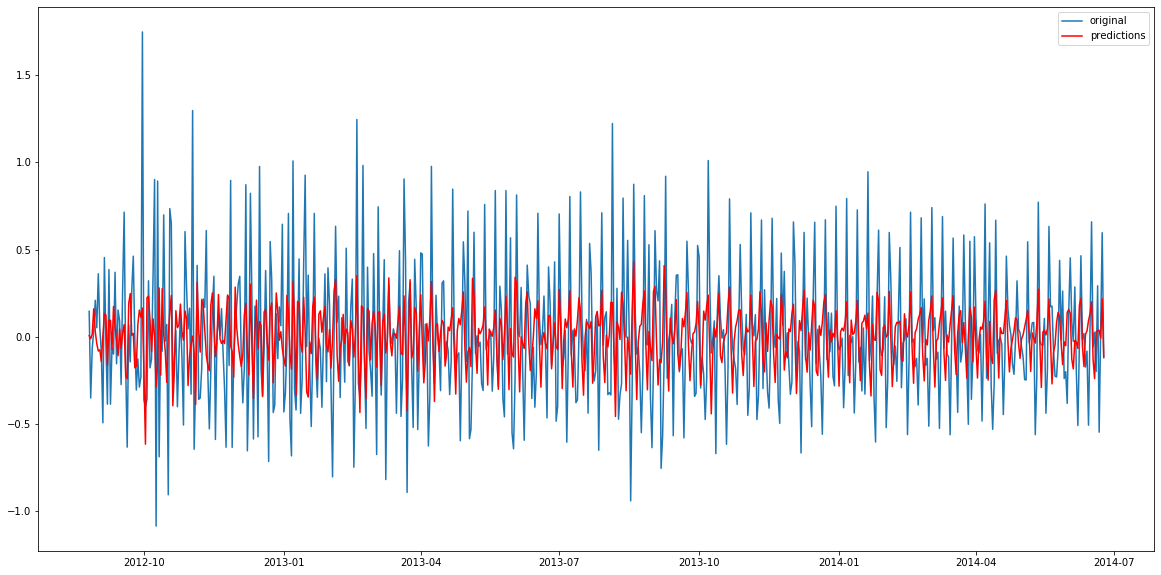

In [54]:
#Modelo AR
#El modelo autorregresivo especifica que la variable de salida depende linealmente de sus propios valores anteriores.
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Train_log, order=(2, 1, 0))  # here the q value is zero since it is just the AR model 
results_AR = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original') 
plt.plot(results_AR.fittedvalues, color='red', label='predictions') 
plt.legend(loc='best') 
plt.show()

Vamos a trazar la curva de validación para el modelo AR.

Tenemos que cambiar la escala del modelo a la escala original.

El primer paso sería almacenar los resultados pronosticados como una serie separada y observarlo.

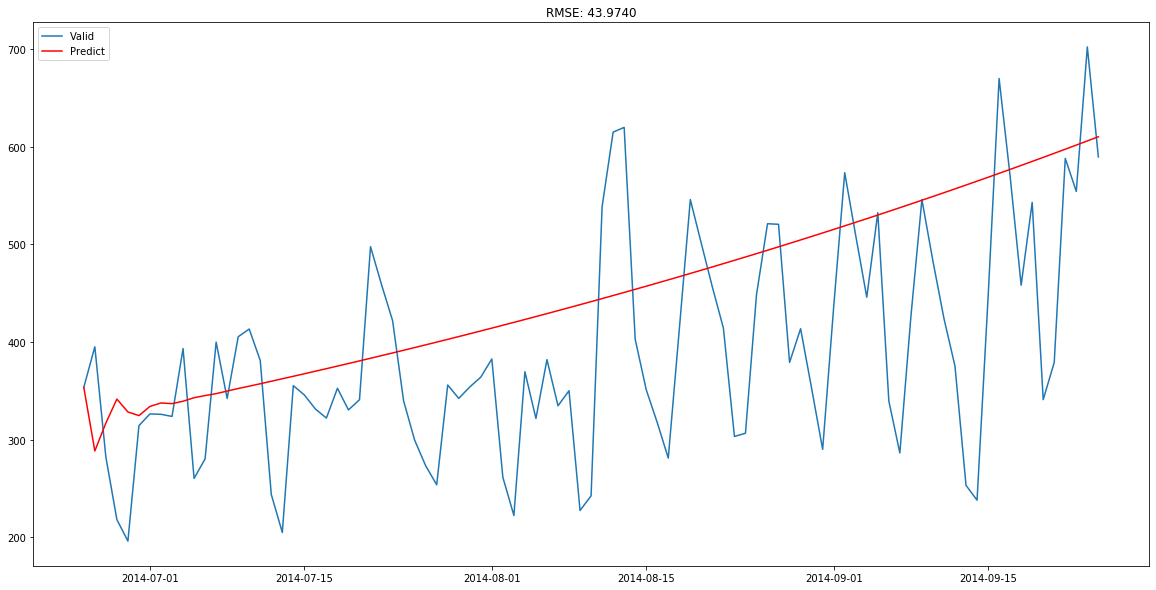

In [55]:
AR_predict=results_AR.predict(start="2014-06-25", end="2014-09-25") 
AR_predict=AR_predict.cumsum().shift().fillna(0) 
AR_predict1=pd.Series(np.ones(Test.shape[0]) * np.log(Test['Count'])[0], index = Test.index) 
AR_predict1=AR_predict1.add(AR_predict,fill_value=0) 
AR_predict = np.exp(AR_predict1)
plt.plot(Test['Count'], label = "Valid") 
plt.plot(AR_predict, color = 'red', label = "Predict") 
plt.legend(loc= 'best') 
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, Test['Count']))/Test.shape[0])) 
plt.show()


Modelo MA
El modelo de promedio móvil especifica que la variable de salida depende linealmente del valor actual y varios valores pasados de un término estocástico (imperfectamente predecible).

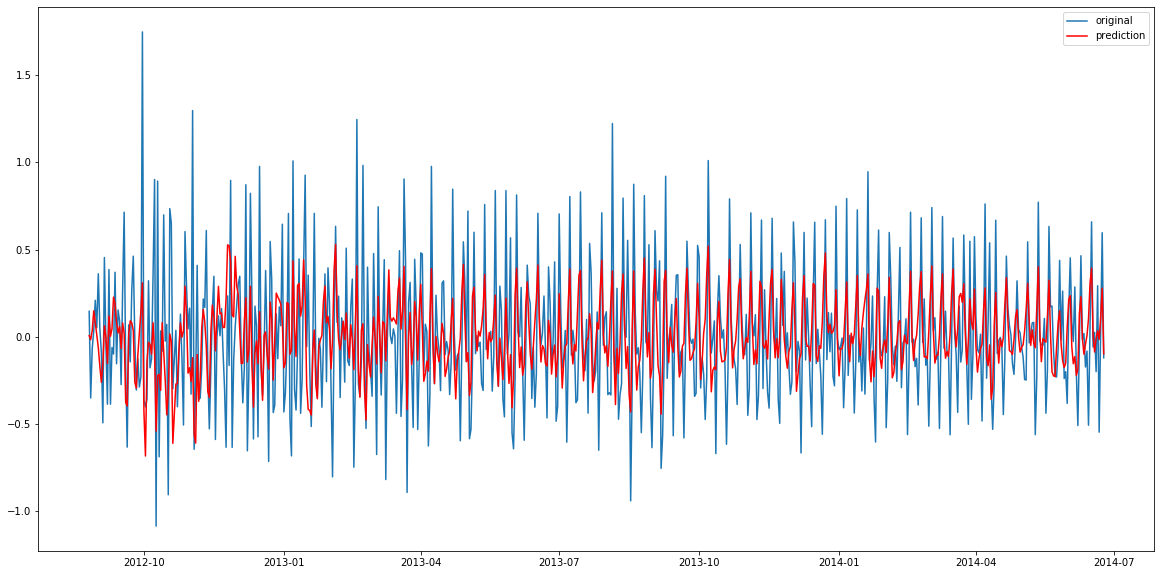

In [56]:
model = ARIMA(Train_log, order=(0, 1, 2))  # here the p value is zero since it is just the MA model 
results_MA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original') 
plt.plot(results_MA.fittedvalues, color='red', label='prediction') 
plt.legend(loc='best') 
plt.show()

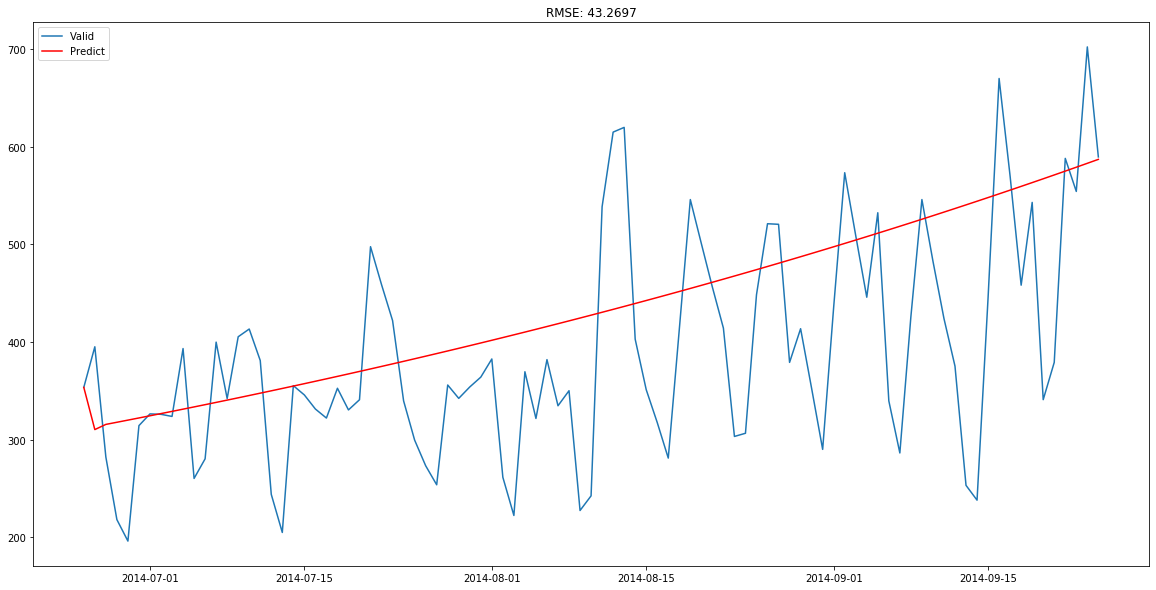

In [57]:
MA_predict=results_MA.predict(start="2014-06-25", end="2014-09-25") 
MA_predict=MA_predict.cumsum().shift().fillna(0) 
MA_predict1=pd.Series(np.ones(Test.shape[0]) * np.log(Test['Count'])[0], index = Test.index) 
MA_predict1=MA_predict1.add(MA_predict,fill_value=0) 
MA_predict = np.exp(MA_predict1)
plt.plot(Test['Count'], label = "Valid") 
plt.plot(MA_predict, color = 'red', label = "Predict") 
plt.legend(loc= 'best') 
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, Test['Count']))/Test.shape[0]))
plt.show()


In [58]:
# Modelo Sarimax para series de tiempo diarias 

C:\Users\Tomas\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


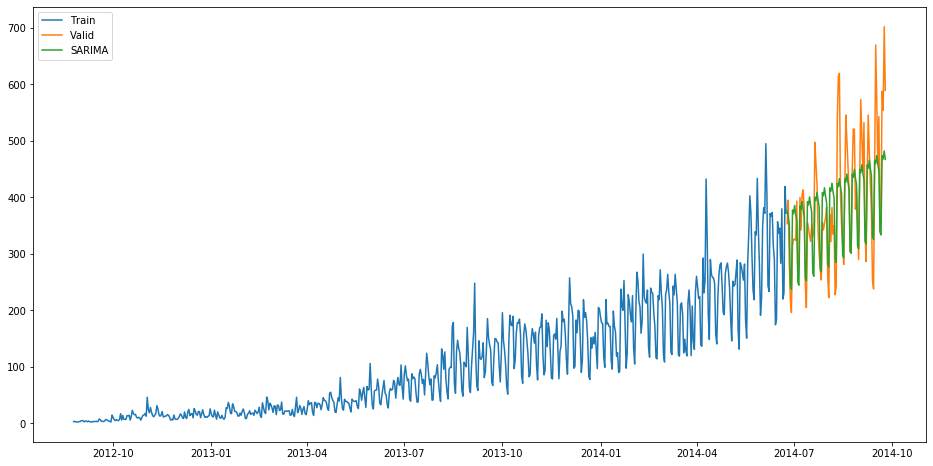

69.66698214753495


In [71]:
import statsmodels.api as sm
y_hat_avg = Test.copy() 
fit1 = sm.tsa.statespace.SARIMAX(Train.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit() 
y_hat_avg['SARIMA'] = fit1.predict(start="2014-6-25", end="2014-9-25", dynamic=True)
plt.figure(figsize=(16,8)) 
plt.plot( Train['Count'], label='Train') 
plt.plot(Test['Count'], label='Valid') 
plt.plot(y_hat_avg['SARIMA'], label='SARIMA') 
plt.legend(loc='best') 
plt.show()

rms = sqrt(mean_squared_error(Test.Count, y_hat_avg.SARIMA)) 
print(rms)

In [68]:
# ahora voy a predecir la serie de tiempo para los dato de valiacion que van desde 2014-9-26  hasta 2015-4-26

In [72]:
predict=fit1.predict(start="2014-9-26", end="2015-4-26", dynamic=True)


C:\Users\Tomas\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:1960: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)
